In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
%matplotlib inline
from scipy.stats.mstats import winsorize

In [2]:
data = pd.read_csv("data.csv", delimiter=',')
data.head()

,customer_id,main_account_loan_no,main_account_active_loan_no,main_account_overdue_no,main_account_outstanding_loan,main_account_sanction_loan,main_account_disbursed_loan,sub_account_loan_no,sub_account_active_loan_no,sub_account_overdue_no,...,outstanding_disburse_ratio,main_account_tenure,sub_account_tenure,disburse_to_sactioned_ratio,active_to_inactive_act_ratio,year_of_birth,disbursed_date,Credit_level,employment_type,age
0,6280549,4,3,0,16582,30838,30838,0,0,0,...,1.86,30838,0,1.0,2.50,1994,2019,11,0,25
1,5301591,2,0,0,0,0,0,0,0,0,...,1.00,0,0,1.0,1.00,1985,2019,13,1,34
2,6319892,0,0,0,0,0,0,0,0,0,...,1.00,0,0,1.0,1.00,1993,2019,-1,1,26
3,5468887,0,0,0,0,0,0,0,0,0,...,1.00,0,0,1.0,1.00,1975,2019,-1,1,44
4,4937996,6,4,1,375168,374641,374641,0,0,0,...,1.00,38,0,1.0,2.33,1993,2019,5,1,26


### Проверяем типы данных - всё ок (числовые типы)
### Размерность датасета (199716 строк на 54 столбца)

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199717 entries, 0 to 199716
Data columns (total 54 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    199717 non-null  int64  
 1   main_account_loan_no           199717 non-null  int64  
 2   main_account_active_loan_no    199717 non-null  int64  
 3   main_account_overdue_no        199717 non-null  int64  
 4   main_account_outstanding_loan  199717 non-null  int64  
 5   main_account_sanction_loan     199717 non-null  int64  
 6   main_account_disbursed_loan    199717 non-null  int64  
 7   sub_account_loan_no            199717 non-null  int64  
 8   sub_account_active_loan_no     199717 non-null  int64  
 9   sub_account_overdue_no         199717 non-null  int64  
 10  sub_account_outstanding_loan   199717 non-null  int64  
 11  sub_account_sanction_loan      199717 non-null  int64  
 12  sub_account_disbursed_loan    

#### Проверяем на наличие ошибок в статистиках - в колонке outstanding_disburse_ratio есть inf-значения

In [4]:
pd.set_option('display.max_columns', 54)
data.describe()

,customer_id,main_account_loan_no,main_account_active_loan_no,main_account_overdue_no,main_account_outstanding_loan,main_account_sanction_loan,main_account_disbursed_loan,sub_account_loan_no,sub_account_active_loan_no,sub_account_overdue_no,sub_account_outstanding_loan,sub_account_sanction_loan,sub_account_disbursed_loan,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,area_id,employee_code_id,mobileno_flag,idcard_flag,Driving_flag,passport_flag,credit_score,main_account_monthly_payment,sub_account_monthly_payment,last_six_month_new_loan_no,last_six_month_defaulted_no,average_age,credit_history,enquirie_no,loan_default,loan_to_asset_ratio,total_account_loan_no,sub_account_inactive_loan_no,total_inactive_loan_no,main_account_inactive_loan_no,total_overdue_no,total_outstanding_loan,total_sanction_loan,total_disbursed_loan,total_monthly_payment,outstanding_disburse_ratio,main_account_tenure,sub_account_tenure,disburse_to_sactioned_ratio,active_to_inactive_act_ratio,year_of_birth,disbursed_date,Credit_level,employment_type,age
count,1.997170e+05,199717.000000,199717.000000,199717.000000,1.997170e+05,1.997170e+05,1.997170e+05,199717.000000,199717.000000,199717.000000,1.997170e+05,1.997170e+05,1.997170e+05,199717.000000,1.997170e+05,199717.000000,199717.000000,199717.000000,199717.000000,199717.000000,199717.000000,199717.0,199717.0,199717.000000,199717.000000,199717.000000,1.997170e+05,1.997170e+05,199717.000000,199717.000000,199717.000000,199717.000000,199717.000000,199717.000000,199717.000000,199717.000000,199717.000000,199717.000000,199717.000000,199717.000000,1.997170e+05,1.997170e+05,1.997170e+05,1.997170e+05,199717.00,1.997170e+05,1.997170e+05,1.997170e+05,199717.000000,199717.000000,199717.0,199717.000000,199717.000000,199717.000000
mean,5.356908e+06,2.464037,1.048414,0.153958,1.687286e+05,2.224323e+05,2.220420e+05,0.059524,0.027689,0.007300,5.583871e+03,7.490970e+03,7.374478e+03,54256.272280,7.582391e+04,74.643960,72.698508,19634.049665,69.085766,7.245222,1547.857919,1.0,1.0,0.023348,0.002143,291.762544,1.314415e+04,3.013734e+02,0.385070,0.095956,8.058107,13.190875,0.203338,0.177391,0.723575,2.523561,1.415623,0.031835,1.447458,0.161258,1.743125e+05,2.299233e+05,2.294165e+05,1.344553e+04,inf,5.059582e+04,2.928000e+03,5.535709e+02,1.438913,1984.876921,2019.0,3.139387,0.487475,34.123079
std,6.819400e+05,5.283968,1.951018,0.544023,9.638043e+05,2.522528e+06,2.525814e+06,0.630648,0.314428,0.112003,1.686728e+05,1.818362e+05,1.812332e+05,12977.656996,1.892894e+04,11.490485,69.706185,3493.655400,22.128288,4.481338,974.901476,0.0,0.0,0.151007,0.046243,339.317591,1.524289e+05,1.304531e+04,0.957339,0.380935,13.860761,21.156865,0.694087,0.382000,0.113613,5.356066,4.038380,0.412795,4.075544,0.560132,9.813640e+05,2.530977e+06,2.534185e+06,1.531618e+05,NaN,2.275670e+06,1.065410e+05,1.141343e+05,0.792213,9.805565,0.0,5.269888,0.561915,9.805565
min,4.170442e+06,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.094638,0.000000,0.000000,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000e+00,-110000.33,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1950.000000,2019.0,-1.000000,0.000000,18.000000
25%,4.767607e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,46977.000000,6.571400e+04,68.730000,14.000000,16505.000000,48.000000,4.000000,712.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.664431,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000,1978.000000,2019.0,

In [5]:
# Убираем inf -значения из столбца outstanding_disburse_ratio
data = data[data.outstanding_disburse_ratio < 10000001.0]

#### Проверяем пропуски(NAN)

In [6]:
print(sum(data.isnull().sum()))

0


#### Проверка дублируемых строк

In [7]:
print(data.duplicated().sum())
# data = data.drop_duplicates().reset_index(drop = True)
# print(data.duplicated().sum())

0


#### Соотношение классов, замечаем несбалансированность классов

In [8]:
print(100*round(data.loan_default.value_counts(normalize=True),4))

0    82.26
1    17.74
Name: loan_default, dtype: float64


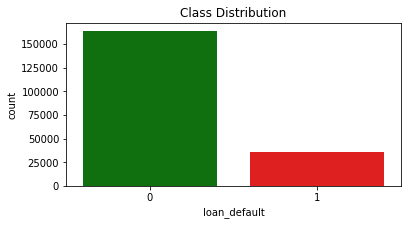

In [9]:
#Graph
colors = {0: 'green', 1: 'red'}
plt.figure(figsize = (6, 3))
ax = sns.countplot(x = 'loan_default', data = data, palette = colors)
plt.title('Class Distribution')
plt.show()

In [10]:
 # ищем столбцы с константными значениями
unique = data.nunique(axis=0).sort_values()
unique.head()

mobileno_flag     1
idcard_flag       1
disbursed_date    1
Driving_flag      2
passport_flag     2
dtype: int64

In [11]:
# удаляем столбцы с константами и customer_id
data.drop(["mobileno_flag","idcard_flag","disbursed_date", "customer_id"], axis=1, inplace=True)
data.shape

(199697, 50)

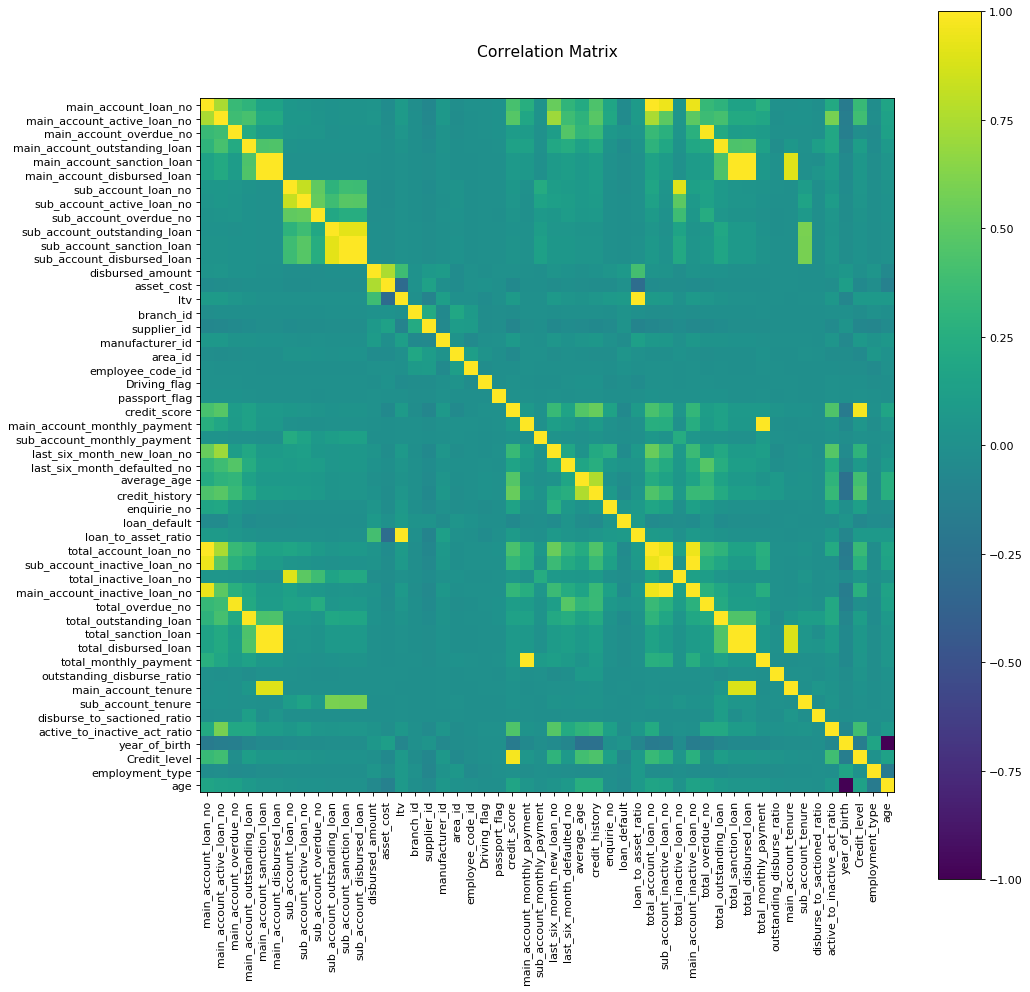

In [12]:
# матрица корреляции
def plotCorrelationMatrix(df, graphWidth):
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title('Correlation Matrix', fontsize=14)
    plt.show()
    
    
plotCorrelationMatrix(data,14)

In [13]:
 # удаляем year_of_birth (корреляция -1 с age)
data.drop(["year_of_birth"], axis=1, inplace=True)
data.shape

(199697, 49)

In [14]:
# проверим столбцы с высокой корреляцией между собой
correlated_features = set()
correlation_matrix = data.corr()
#  ищем столбцы, которые коррелируют с другими, при этом, перед выбором одного из двух выбираем тот, который меньше коррелирует с таргетом 
for i in range(len(correlation_matrix.columns)):

    for j in range(i):

        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            if np.abs(data[data.columns[i]].corr(data.loan_default)) >= np.abs(data[data.columns[j]].corr(data.loan_default)):
                colname = correlation_matrix.columns[j]
            else:
                colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
            
print(correlated_features)

{'main_account_outstanding_loan', 'total_disbursed_loan', 'total_overdue_no', 'main_account_sanction_loan', 'loan_to_asset_ratio', 'sub_account_outstanding_loan', 'main_account_disbursed_loan', 'sub_account_disbursed_loan', 'main_account_monthly_payment', 'main_account_inactive_loan_no', 'credit_score', 'sub_account_inactive_loan_no', 'total_inactive_loan_no', 'main_account_loan_no'}


In [15]:
# удалим столбцы с высокой корреляцией между собой
data.drop(correlated_features, axis=1, inplace=True)
data.shape

(199697, 35)

C:\Users\Evgeny\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


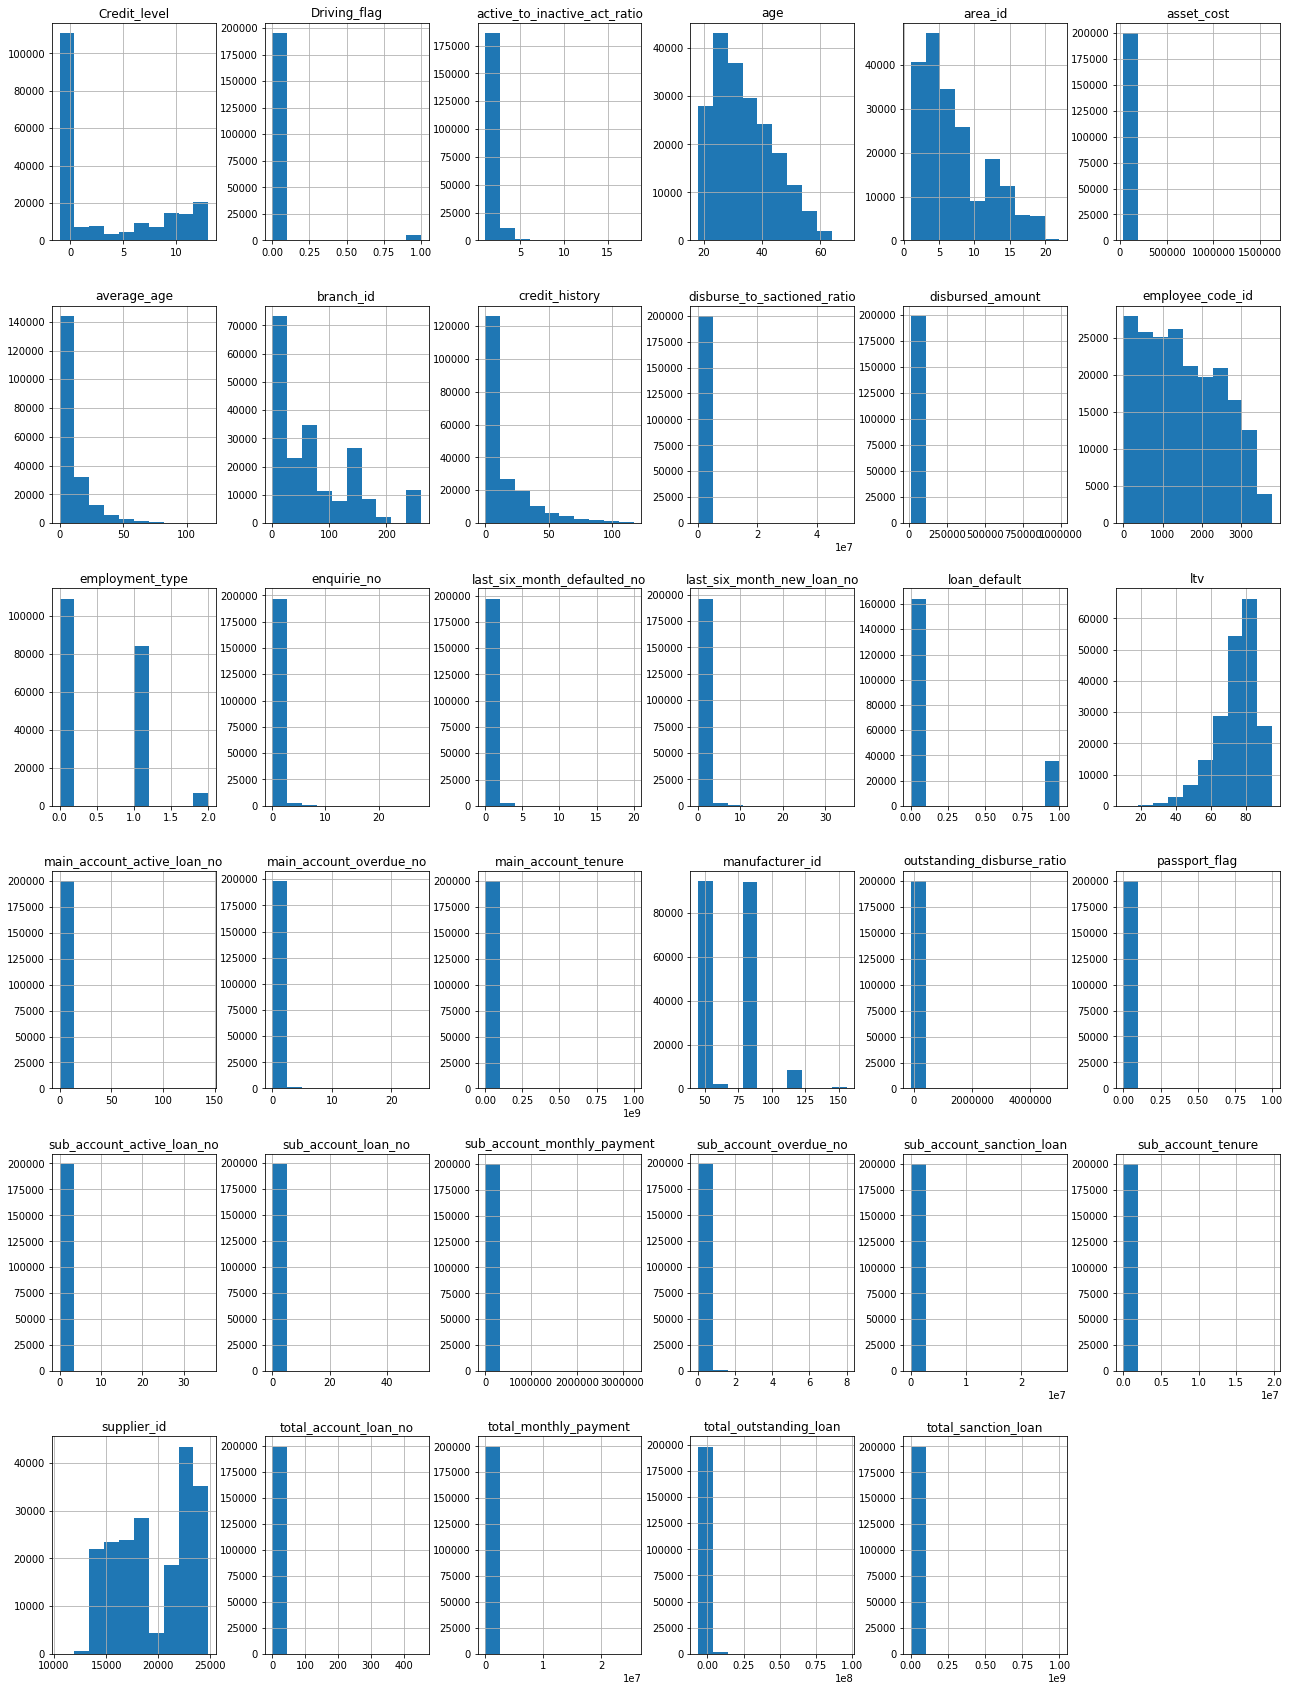

In [16]:
# Смотрим распределение признаков
fig = plt.figure(figsize = (22,30))
ax = fig.gca()
data.hist(ax = ax)
plt.show()

In [17]:
# Корреляция с таргетом
np.abs(data.corrwith(data.loan_default)).sort_values(ascending=False)

loan_default                    1.000000
ltv                             0.091420
disbursed_amount                0.070930
Credit_level                    0.065037
area_id                         0.044963
enquirie_no                     0.042141
main_account_active_loan_no     0.038230
main_account_overdue_no         0.037071
age                             0.035493
last_six_month_defaulted_no     0.032573
credit_history                  0.032395
total_account_loan_no           0.032390
last_six_month_new_loan_no      0.027292
supplier_id                     0.027011
branch_id                       0.026931
total_outstanding_loan          0.025864
employment_type                 0.023718
average_age                     0.022797
manufacturer_id                 0.022496
employee_code_id                0.018451
active_to_inactive_act_ratio    0.013141
asset_cost                      0.011218
total_monthly_payment           0.010706
total_sanction_loan             0.009347
sub_account_loan

In [18]:
# Удаляем признаки по суб-счетам, так как они не несут полезных данных и не корредируют с таргетом
sub_accaunt_data = ["sub_account_loan_no","sub_account_active_loan_no",
                    "sub_account_sanction_loan","sub_account_tenure",
                    "sub_account_overdue_no","sub_account_monthly_payment"]

data.drop(labels=sub_accaunt_data, axis=1, inplace=True)
data.reset_index(inplace=True, drop=True)

In [19]:
# двойной десятичный логарифм не развернул распределение признака
data.drop(["disburse_to_sactioned_ratio"], axis=1, inplace=True) 

In [20]:
data.columns

Index(['main_account_active_loan_no', 'main_account_overdue_no',
       'disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id',
       'manufacturer_id', 'area_id', 'employee_code_id', 'Driving_flag',
       'passport_flag', 'last_six_month_new_loan_no',
       'last_six_month_defaulted_no', 'average_age', 'credit_history',
       'enquirie_no', 'loan_default', 'total_account_loan_no',
       'total_outstanding_loan', 'total_sanction_loan',
       'total_monthly_payment', 'outstanding_disburse_ratio',
       'main_account_tenure', 'active_to_inactive_act_ratio', 'Credit_level',
       'employment_type', 'age'],
      dtype='object')

# Триминг (вручную по графикам)

In [21]:
data = data[data["disbursed_amount"] < 191393]
data = data[data["asset_cost"] < 281164]
data = data[data["age"] < 65]
data = data[data["outstanding_disburse_ratio"] < 700000]
data = data[data["main_account_active_loan_no"] < 10]
data = data[data["main_account_overdue_no"] < 5]
data = data[data["last_six_month_new_loan_no"] < 9]
data = data[data["last_six_month_defaulted_no"] < 5]
data = data[data["enquirie_no"] < 12]
data = data[data["total_account_loan_no"] < 40]
data = data[data["total_monthly_payment"] < 500000]

# Логарифмирование (вручную по графикам)

In [22]:
data["total_monthly_payment"] = np.log(data["total_monthly_payment"]+15)
data["asset_cost"] = np.log(data["asset_cost"])
data["disbursed_amount"] = np.log(data["disbursed_amount"])
data["total_outstanding_loan"] = np.log10(winsorize( (data["total_outstanding_loan"]), limits = 0.05)+1)

# Winsorize + Логарифмирование

In [23]:
data["outstanding_disburse_ratio"] = np.log10(winsorize( (data["outstanding_disburse_ratio"] + 0.000001), limits = 0.05))
data["main_account_tenure"] = np.log10(winsorize( (data["main_account_tenure"]+0.000001 ), limits = 0.05))

In [24]:
# преобразование статистики путем ограничения экстремальных значений в статистических данных, чтобы уменьшить влияние возможных выбросов.
cols_for_winsorize = ['main_account_active_loan_no',
                      'main_account_overdue_no',
                      'last_six_month_new_loan_no', 
                      'last_six_month_defaulted_no',
                      'enquirie_no','total_account_loan_no',
                     'total_account_loan_no']           

for col in cols_for_winsorize:

    data[col] = winsorize(data[col],limits = 0.05)

    
data.shape

(196772, 28)

# Логарифимрование

In [25]:
log_cols = ['average_age',
            'total_sanction_loan',
            'active_to_inactive_act_ratio']

for col in log_cols:
    data[col] = np.log(data[col]+0.000001)    
data.shape

(196772, 28)

In [26]:
pd.set_option('display.max_rows', 90)
np.abs(data.corrwith(data.loan_default)).sort_values(ascending=False)

loan_default                    1.000000
ltv                             0.092353
disbursed_amount                0.079952
Credit_level                    0.063982
main_account_overdue_no         0.046981
area_id                         0.045633
enquirie_no                     0.039113
last_six_month_defaulted_no     0.037365
total_account_loan_no           0.037102
age                             0.034488
main_account_active_loan_no     0.032989
average_age                     0.032397
credit_history                  0.030564
main_account_tenure             0.028982
branch_id                       0.026935
supplier_id                     0.026594
last_six_month_new_loan_no      0.026564
total_sanction_loan             0.026315
total_outstanding_loan          0.025740
employment_type                 0.023828
manufacturer_id                 0.022525
outstanding_disburse_ratio      0.020607
employee_code_id                0.018853
active_to_inactive_act_ratio    0.016417
asset_cost      

C:\Users\Evgeny\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


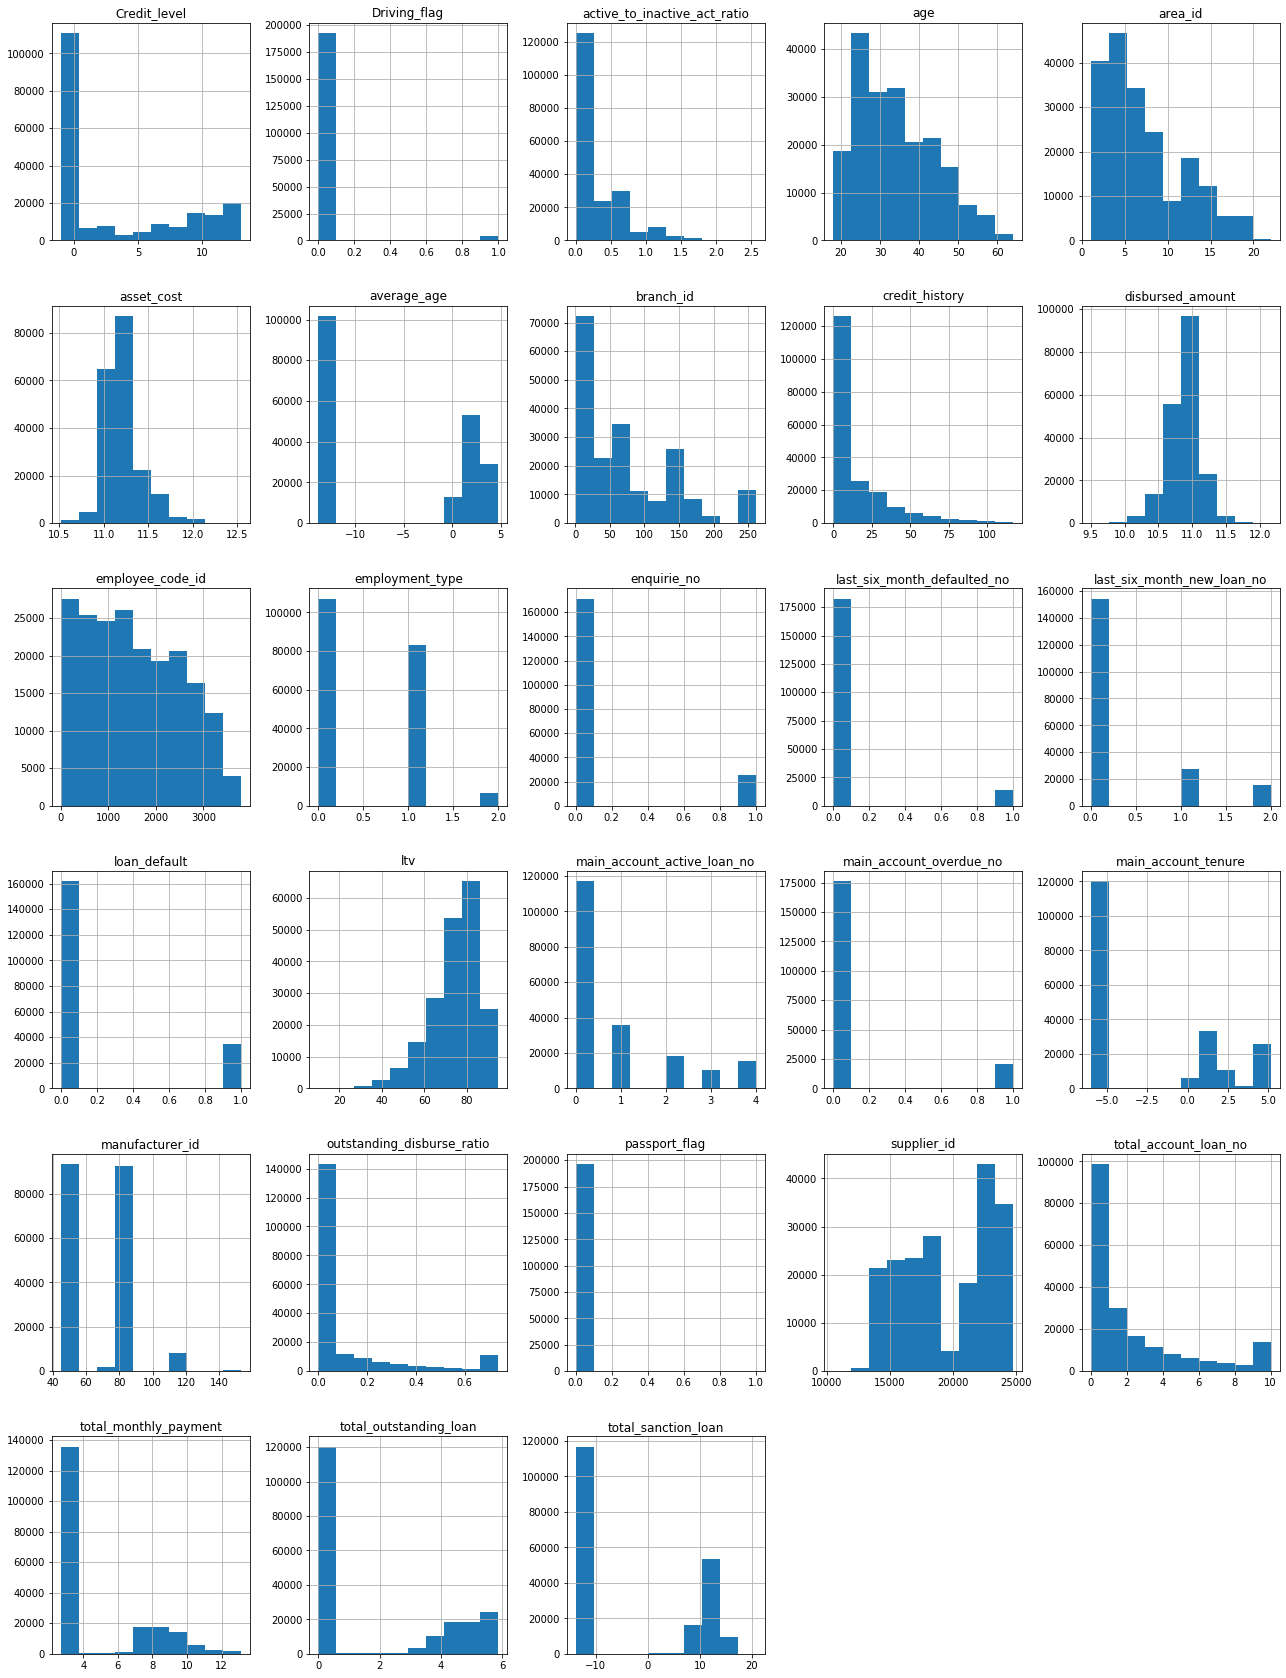

In [27]:
fig = plt.figure(figsize = (22,30))
ax = fig.gca()
data.hist(ax = ax)
plt.show()

In [28]:
# В категориальные признаки определил: филиалы магазинов, Автодилер, Производитель автомобиля, локация выдачи кредита, 
# Сотрудник организации, зарегистрировавшей выдачу, предоставление паспорта, водительских прав, тип трудоустройства
categorical_cols = ['branch_id',
                    'supplier_id',
                    'manufacturer_id',
                    'area_id',
                    'employee_code_id',
                    'Driving_flag',
                    'passport_flag',
                    'employment_type']

In [29]:
# Количество уникальных значений для каждого из категориальных признаков
data[categorical_cols].nunique(axis=0).sort_values(ascending=False)

employee_code_id    3254
supplier_id         2928
branch_id             82
area_id               22
manufacturer_id        9
employment_type        3
passport_flag          2
Driving_flag           2
dtype: int64

# Изучаем среднее значение таргета для категорий каждого из категориальных признаков

In [30]:
for col in categorical_cols:
    df = data.groupby(col)['loan_default'].agg(('mean','count')).sort_values("mean", ascending=False) # отсортировал по среднему
    print(df[df["count"] > 1]) # убрал категории, в которых количество строк меньше 2
    print()

               mean  count
branch_id                 
251        0.284906   3180
254        0.275403   1427
97         0.262346    324
36         0.247615   7443
35         0.245872    545
78         0.243464   1836
146        0.241667   4440
117        0.241015    473
153        0.236111    576
158        0.235294     51
16         0.235240   5386
10         0.234571   3500
105        0.234383   2065
74         0.232474   3609
69         0.231629    626
65         0.231469   2968
260        0.226481    287
217        0.224359    156
147        0.222926   3472
14         0.218236   1338
120        0.215087   3566
85         0.205178   1545
248        0.200910   1538
76         0.198288    701
259        0.195286    297
13         0.189911   2359
18         0.187779   4255
159        0.186851   2312
61         0.186840   4164
111        0.186667     75
249        0.184066    728
5          0.182996   7563
136        0.182784   6308
64         0.182699   1341
101        0.182692    312
7

#### Target encoding для признаков 'branch_id', 'manufacturer_id', 'area_id',"employee_code_id","supplier_id"

In [31]:
# Функция для таргет-энкодинга со сглаживанием
def calc_smooth_mean(df, by, on, m):
    # Compute the global mean
    mean = df[on].mean()

    # Compute the number of values and the mean of each group
    agg = df.groupby(by)[on].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    smooth = (counts * means + m * mean) / (counts + m)

    # Replace each value by the according smoothed mean
    return df[by].map(smooth)

In [32]:
target_cols = ['branch_id', 'manufacturer_id', 'area_id',"employee_code_id","supplier_id"]
for col in target_cols:    
    new_col_mean = col + "_mean"
    data[new_col_mean] = calc_smooth_mean(data,col, "loan_default", 500)
    print(f"{col} correlates with target:",
          data.loan_default.corr(data[col])
         )
    print(f" {new_col_mean} encoded by target encoding is:",
          data.loan_default.corr(data[new_col_mean])
         )
    print()

categorical_cols = ['supplier_id',"employee_code_id","branch_id","area_id","manufacturer_id"]
# data.drop(labels=categorical_cols, axis=1, inplace=True)

branch_id correlates with target: 0.026934688542653136
 branch_id_mean encoded by target encoding is: 0.10415827236166657

manufacturer_id correlates with target: -0.02252464601050692
 manufacturer_id_mean encoded by target encoding is: 0.04060766343990891

area_id correlates with target: 0.04563274770871583
 area_id_mean encoded by target encoding is: 0.07726781809560752

employee_code_id correlates with target: 0.018852789004233674
 employee_code_id_mean encoded by target encoding is: 0.1708001129391899

supplier_id correlates with target: 0.026593738994134593
 supplier_id_mean encoded by target encoding is: 0.14435079645476864



#### One-hot encoding для employment_type

In [33]:
data = pd.get_dummies(data,
                       columns=['employment_type'],
                       prefix_sep='_', 
                       prefix="employment_type")  


# Polinomial features

In [34]:
data["branch_id_mean_ltv_manufacturer_id_mean_employee_code_id_mean"] = data["employee_code_id_mean"]  * data["branch_id_mean"]  * data["ltv"] * data["manufacturer_id_mean"]

data["branch_id_mean_ltv_manufacturer_id_mean"] = data["branch_id_mean"]  * data["ltv"] * data["manufacturer_id_mean"]

data["branch_id_mean_ltv_area_id_mean"] = data["branch_id_mean"] * data["area_id_mean"] * data["ltv"]

data["Credit_level^2_age"] = data["Credit_level"] * data["Credit_level"] * data["age"]

data["Credit_level^2"] = data["Credit_level"] * data["Credit_level"]

data["Credit_level^2_credit_history"] = data["Credit_level"] * data["Credit_level"] * data["credit_history"]

data["Credit_level_age_main_account_active_loan_no"] = data["Credit_level"] * data["age"] * data["main_account_active_loan_no"]

data["asset_cost_ltv^2_disbursed_amount"] = data["asset_cost"] * data["ltv"] * data["ltv"] * data["disbursed_amount"]

data["branch_id_mean_ltv_disbursed_amount^2"] = data["branch_id_mean"] * data["ltv"] * data["disbursed_amount"] * data["disbursed_amount"]

data["enquirie_no_Credit_level^2_credit_history"] = np.log10(data["enquirie_no"] * data["Credit_level"] * data["Credit_level"] * data["credit_history"]+0.000001)

data["branch_id_mean_ltv_manufacturer_id_mean_asset_cost_ltv^2_disbursed_amount"] = data["branch_id_mean"] * data["ltv"] * data["ltv"] * data["ltv"] * data["manufacturer_id_mean"] * data["asset_cost"] * data["disbursed_amount"]

data["branch_id_mean^3_ltv_ltv_minus_Credit_level"] = data["branch_id_mean"] * data["branch_id_mean"] * data["branch_id_mean"] *data["ltv"] * (data["ltv"]-data["Credit_level"])

data["manufacturer_id_mean_branch_id_mean^3_ltv"] = data["branch_id_mean"]  * data["branch_id_mean"]  * data["branch_id_mean"]  * data["ltv"] * data["manufacturer_id_mean"]

data["ltv_to_passport_flag"] = (data["ltv"]+0.000001)/(data["passport_flag"]+0.000001)

data["disbursed_amount_to_asset_cost_to_age"] = (data["disbursed_amount"]+0.000001)/(data["asset_cost"]+0.000001)/(data["age"]+0.000001)

data["ltv_to_age"] = (data["ltv"]+0.000001)/(data["age"]+0.000001)

data["ltv_minus_Credit_level"] = data["ltv"] - data["Credit_level"]

data["ltv_minus_total_account_loan_no"] = data["ltv"] - data["total_account_loan_no"]

data["ltv_minus_age"] = data["ltv"] - data["age"]

In [35]:
data.to_csv("Mdata.csv", index=False)

In [36]:
# g = data.groupby("age")['loan_default']

# gg = pd.concat([g.value_counts(), 
#                 g.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))
# print (gg.tail(40))

# Влияние возраста заемщика на таргет

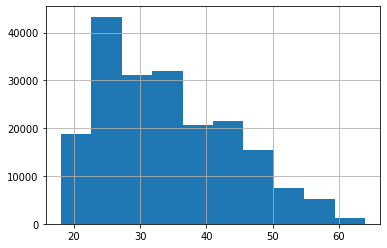

In [37]:
data.age.hist()
plt.show()

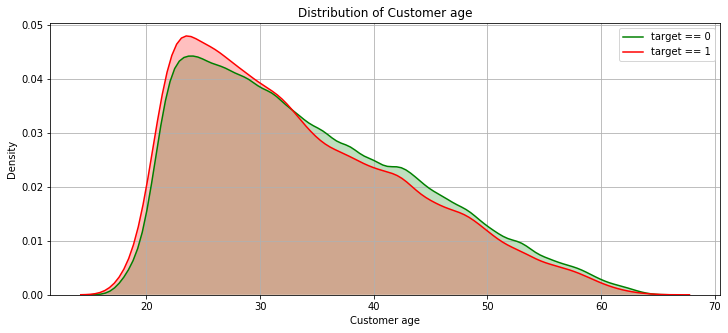

In [38]:
plt.figure(figsize = (12, 5))

# KDE plot of loans that were repaid on time
sns.kdeplot(data.loc[data['loan_default'] == 0, 'age'], label = 'target == 0',shade=True, color="g")

# KDE plot of loans which were not repaid on time
sns.kdeplot(data.loc[data['loan_default'] == 1, 'age'], label = 'target == 1',shade=True, color="red")
plt.grid()
# Labeling of plot
plt.xlabel('Customer age'); plt.ylabel('Density'); plt.title('Distribution of Customer age');

#### Можно заметить, что после 32-33 количество дефолтов становится меньше количества закрытых кредитов.

                loan_default        age
Age_binned                             
(17.999, 23.0]      0.203899  21.739237
(23.0, 28.0]        0.186653  25.964963
(28.0, 33.0]        0.180490  30.935690
(33.0, 38.0]        0.168609  35.933508
(38.0, 44.0]        0.166606  41.409563
(44.0, 49.0]        0.167221  46.853099
(49.0, 54.0]        0.159066  51.775571
(54.0, 59.0]        0.155090  56.736251
(59.0, 65.0]        0.125858  61.082380


C:\Users\Evgeny\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


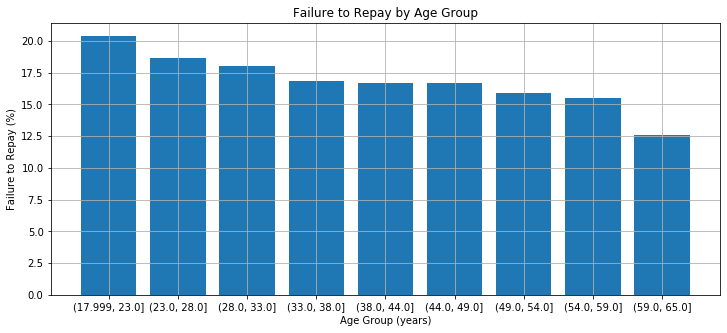

In [39]:
age_data = data[['loan_default', 'age']]

# Bin the age data
age_data['Age_binned'] = pd.cut(age_data['age'], bins = np.linspace(18, 65, num = 10, dtype = int), include_lowest=True)
# print(age_data.head(10))

age_groups  = age_data.groupby('Age_binned').mean()
print(age_groups)

plt.figure(figsize = (12, 5))
plt.grid()
# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['loan_default'])

# Plot labeling
plt.xticks(rotation = 0); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

#### Очевидный тренд, указывающий на то, что с возврастом вероятность допущения дефолта по кредиту уменьшается.

# Влияние коэффициента ltv на таргет
## Ltv (Loan to Value of the asset) 
### Соотношение размера кредита и стоимости актива (предположительно в %%)

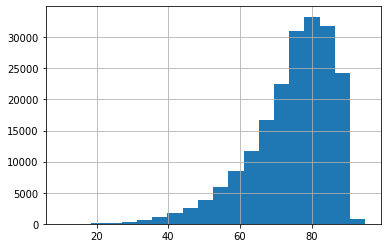

In [40]:
data.ltv.hist(bins=20)
plt.show()

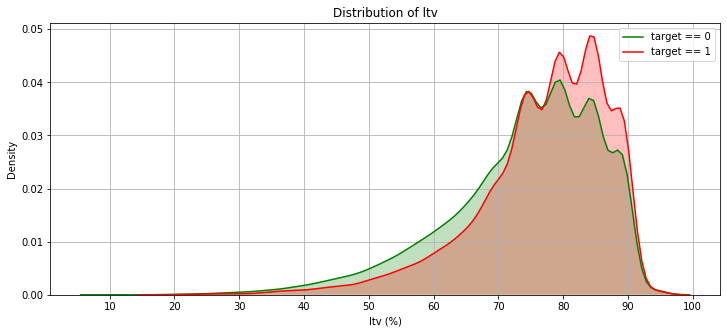

In [41]:
plt.figure(figsize = (12,5))

# KDE plot of loans that were repaid on time
sns.kdeplot(data.loc[data['loan_default'] == 0, 'ltv'], label = 'target == 0',shade=True, color="g", bw=1.5)

# KDE plot of loans which were not repaid on time
sns.kdeplot(data.loc[data['loan_default'] == 1, 'ltv'], label = 'target == 1',shade=True, color="r", bw=1.5)
plt.grid()
plt.xticks([ 10,20, 30, 40, 50, 60, 70,80,90,100])
# Labeling of plot
plt.xlabel('ltv (%)'); plt.ylabel('Density'); plt.title('Distribution of ltv');

#### Здесь видно, что начиная с доли кредита в стоимости машины более 75%, количество дефолтов превышвет количество погашенных в срок кредитов.

            loan_default        ltv
ltv_binned                         
(10, 22]        0.074074  19.436296
(22, 35]        0.091365  30.378313
(35, 48]        0.103989  42.981243
(48, 61]        0.117726  55.770880
(61, 74]        0.151054  68.635415
(74, 87]        0.200207  80.233600
(87, 100]       0.218033  89.081938


C:\Users\Evgeny\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


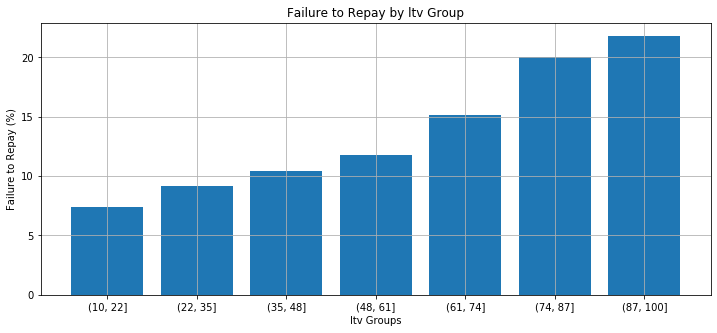

In [42]:
ltv_data = data[['loan_default', 'ltv']]

# Bin the age data
ltv_data['ltv_binned'] = pd.cut(ltv_data['ltv'], bins = np.linspace(10, 100, num = 8, dtype = int ))
# print(ltv_data.head(10))

ltv_groups  = ltv_data.groupby('ltv_binned').mean()
print(ltv_groups)


plt.figure(figsize = (12, 5))

# Graph the age bins and the average of the target as a bar plot
plt.bar(ltv_groups.index.astype(str), 100 * ltv_groups['loan_default'])
plt.grid()
# Plot labeling
plt.xticks(rotation = 0); plt.xlabel('ltv Groups'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by ltv Group');

#### Очевидный тренд, показывающий прямую зависимость вероятности дефолта от доли кредитных средств в общей стоимости автомобиля.

# Влияние показателя Credit_level на таргет

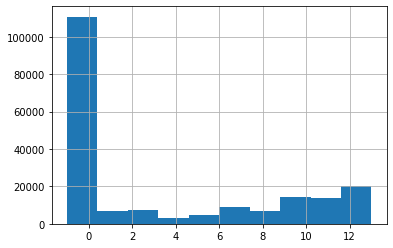

In [43]:
data.Credit_level.hist()
plt.show()

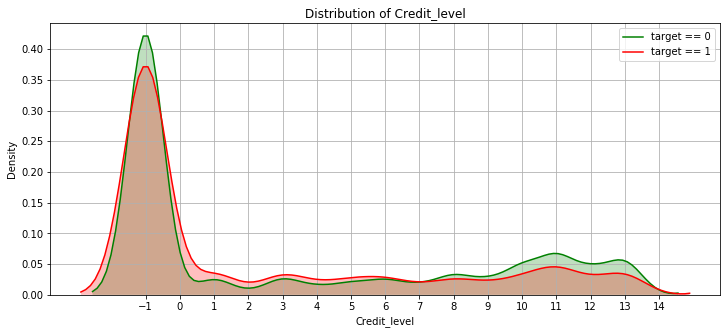

In [44]:
plt.figure(figsize = (12, 5))

# KDE plot of loans that were repaid on time
sns.kdeplot(data.loc[data['loan_default'] == 0, 'Credit_level'], label = 'target == 0',shade=True, color="g")

# KDE plot of loans which were not repaid on time
sns.kdeplot(data.loc[data['loan_default'] == 1, 'Credit_level'], label = 'target == 1',shade=True, color="r")
plt.xticks([-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
# Labeling of plot
plt.grid()
plt.xlabel('Credit_level'); plt.ylabel('Density'); plt.title('Distribution of Credit_level');

#### Количество погашенных кредитов превышает количество дефолтов у клиентов с кредитным рейтингом выше 7.5

                     loan_default  Credit_level
Credit_level_binned                            
(-1.001, 0.0]            0.188473     -1.000000
(0.0, 2.0]               0.253318      1.117897
(2.0, 4.0]               0.230511      3.313915
(4.0, 6.0]               0.214845      5.552869
(6.0, 8.0]               0.157506      7.680027
(8.0, 11.0]              0.134179     10.316593
(11.0, 13.0]             0.121966     12.606856


C:\Users\Evgeny\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


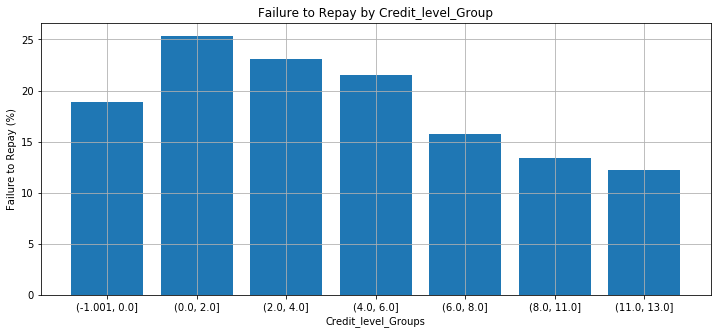

In [45]:
Credit_level_data = data[['loan_default', 'Credit_level']]


# Bin the age data
Credit_level_data['Credit_level_binned'] = pd.cut(Credit_level_data['Credit_level'], 
                                                  bins = [-1,0,2,4,6,8,11,13], 
                                                  include_lowest=True
                                                 )
# print(Credit_level_data.head(10))

Credit_level_groups  = Credit_level_data.groupby('Credit_level_binned').mean()
print(Credit_level_groups)

plt.figure(figsize = (12, 5))

# Graph the age bins and the average of the target as a bar plot
plt.bar(Credit_level_groups.index.astype(str), 100 * Credit_level_groups['loan_default'])
plt.grid()
# Plot labeling
plt.xticks(rotation = 0); plt.xlabel('Credit_level_Groups'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Credit_level_Group');

#### В целом с ростом данного коэффициента вероятность дефолта падает.

# Влияние размера выданного кредита на таргет

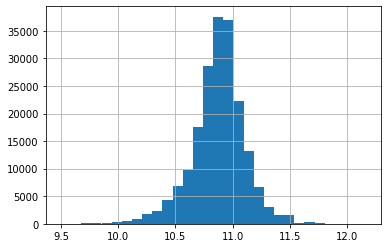

In [46]:
data.disbursed_amount.hist(bins = 30)
plt.show()

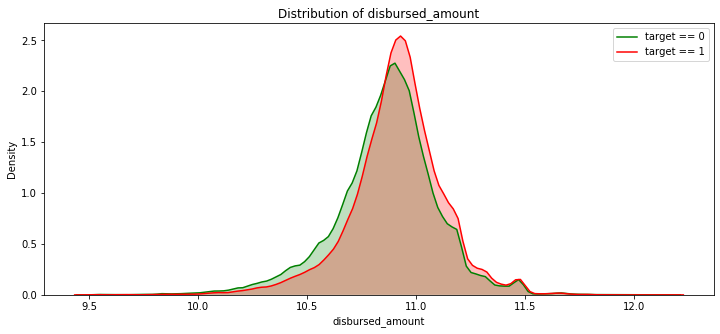

In [47]:
plt.figure(figsize = (12, 5))

# KDE plot of loans that were repaid on time
sns.kdeplot(data.loc[data['loan_default'] == 0, 'disbursed_amount'], label = 'target == 0',shade=True, color="g")

# KDE plot of loans which were not repaid on time
sns.kdeplot(data.loc[data['loan_default'] == 1, 'disbursed_amount'], label = 'target == 1',shade=True, color="r")

# Labeling of plot
plt.xlabel('disbursed_amount'); plt.ylabel('Density'); plt.title('Distribution of disbursed_amount');

#### Количество просроченных кредитов превышает количетсво погашенных при сумме кредита более 50000.

                         loan_default  disbursed_amount
disbursed_amount_binned                                
(9.496, 9.941]               0.109131          9.793556
(9.941, 10.385]              0.110092         10.249067
(10.385, 10.83]              0.140806         10.688643
(10.83, 11.274]              0.201639         10.984601
(11.274, 11.718]             0.209967         11.396288
(11.718, 12.162]             0.113514         11.845712


C:\Users\Evgeny\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


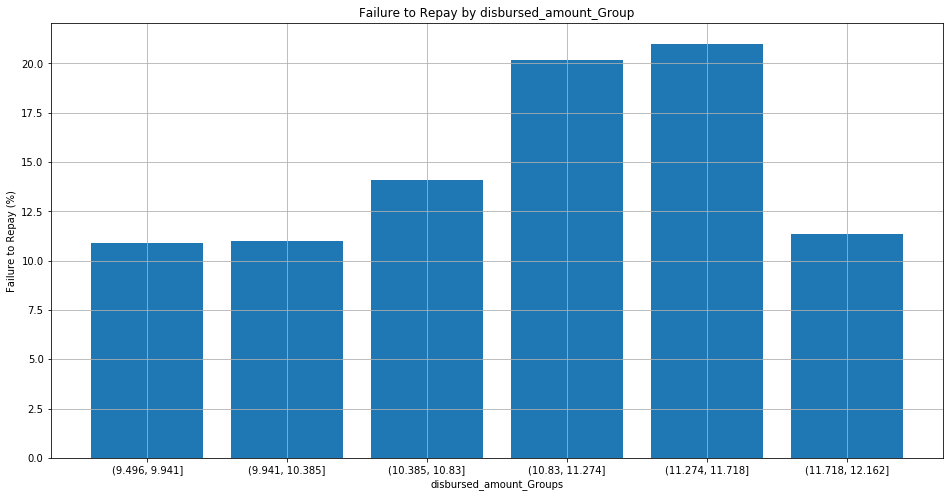

In [48]:
disbursed_amount_data = data[['loan_default', 'disbursed_amount']]


# Bin the age data
disbursed_amount_data['disbursed_amount_binned'] = pd.cut(disbursed_amount_data['disbursed_amount'], 
                                                  bins = np.linspace(min(data["disbursed_amount"]), max(data["disbursed_amount"]), num = 7), 
                                                  include_lowest=True
                                                 )
# print(disbursed_amount_data.head(10))

disbursed_amount_groups  = disbursed_amount_data.groupby('disbursed_amount_binned').mean()
print(disbursed_amount_groups)

plt.figure(figsize = (16, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(disbursed_amount_groups.index.astype(str), 100 * disbursed_amount_groups['loan_default'])
plt.grid()
# Plot labeling
plt.xticks(rotation =0); plt.xlabel('disbursed_amount_Groups'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by disbursed_amount_Group');

### main_account_overdue_no (количество просрочек по счету)

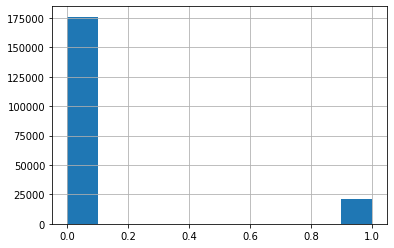

In [49]:
# data = data[data["main_account_overdue_no"] < 10]
data["main_account_overdue_no"].hist()

                                loan_default  main_account_overdue_no
main_account_overdue_no_binned                                       
(-0.001, 0.5]                       0.172013                      0.0
(0.5, 1.0]                          0.230477                      1.0


C:\Users\Evgeny\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


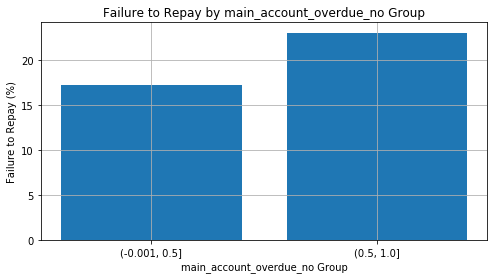

In [50]:
main_account_overdue_no_data = data[['loan_default', 'main_account_overdue_no']]

# Bin the age data
main_account_overdue_no_data['main_account_overdue_no_binned'] = pd.cut(main_account_overdue_no_data['main_account_overdue_no'], 
                                                bins = (0,0.5,1), 
                                                include_lowest=True
                                               )
# print(average_age_data.head(10))

main_account_overdue_no_groups  = main_account_overdue_no_data.groupby('main_account_overdue_no_binned').mean()
print(main_account_overdue_no_groups)

plt.figure(figsize = (8, 4))

# Graph the bins and the average of the target as a bar plot
plt.bar(main_account_overdue_no_groups.index.astype(str), 100 * main_account_overdue_no_groups['loan_default'])
plt.grid()
# Plot labeling
plt.xticks(rotation = 0); plt.xlabel('main_account_overdue_no Group'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by main_account_overdue_no Group');

# Влияние стоимости актива на таргет

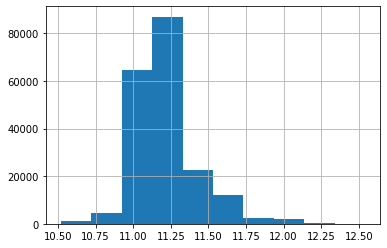

In [51]:
data["asset_cost"].hist()

                   loan_default  asset_cost
asset_cost_binned                          
(10.518, 10.856]       0.180256   10.748769
(10.856, 11.193]       0.172715   11.095468
(11.193, 11.531]       0.184151   11.307087
(11.531, 11.868]       0.192574   11.628700
(11.868, 12.206]       0.173343   11.997290
(12.206, 12.543]       0.136842   12.313999


C:\Users\Evgeny\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


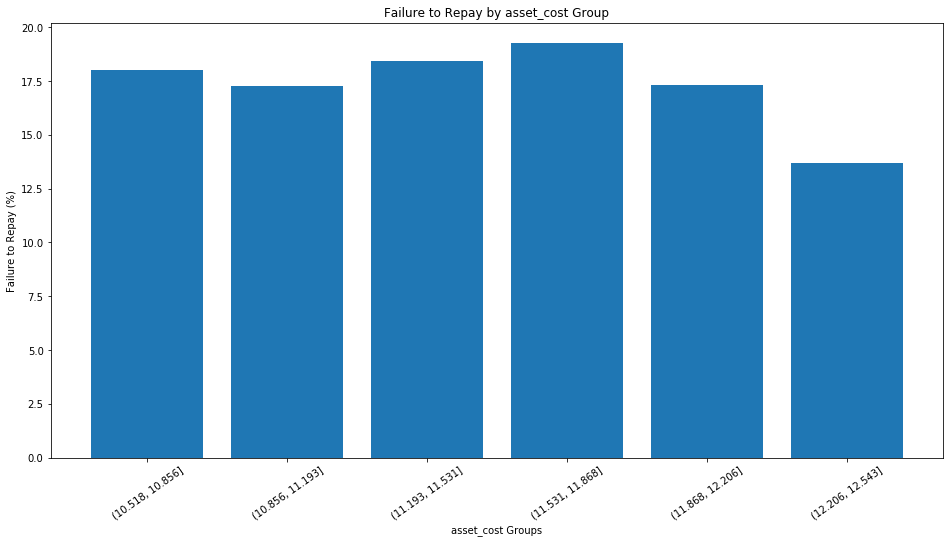

In [52]:
asset_cost_data = data[['loan_default', 'asset_cost']]

# Bin the age data
asset_cost_data['asset_cost_binned'] = pd.cut(asset_cost_data['asset_cost'], bins = np.linspace(min(asset_cost_data['asset_cost']), max(asset_cost_data['asset_cost']), num = 7 ),include_lowest=True)
# print(ltv_data.head(10))

asset_cost_groups  = asset_cost_data.groupby('asset_cost_binned').mean()
print(asset_cost_groups)


plt.figure(figsize = (16, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(asset_cost_groups.index.astype(str), 100 * asset_cost_groups['loan_default'])

# Plot labeling
plt.xticks(rotation = 35); plt.xlabel('asset_cost Groups'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by asset_cost Group');
                                    
                   
                  
                   

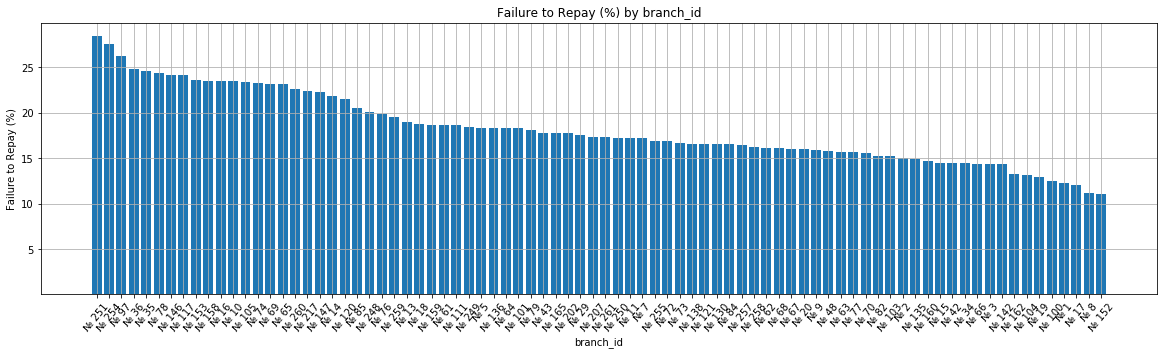

In [53]:
p = data.groupby("branch_id")['loan_default'].agg(('mean','count')).sort_values("mean", ascending=False) # отсортировал по среднему
plt.figure(figsize = (20, 5))
plt.bar(["№ "+ str(x) for x in p.index], p.iloc[:,0]*100)

plt.grid()
plt.yticks([5,10,15,20,25])
# Labeling of plot
plt.xlabel("branch_id"); plt.ylabel('Density'); plt.title('Failure to Repay (%) by branch_id');
plt.xticks(rotation = 50);
plt.ylabel('Failure to Repay (%)')
plt.show()

#### В зависимости от филиала вероятность дефолта может принимать значения в диапазоне от 11% до 28,5%.

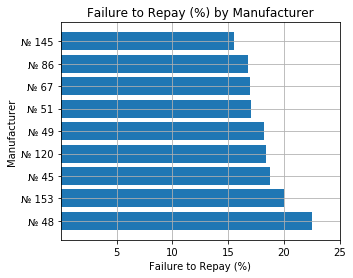

In [54]:
p = data.groupby("manufacturer_id")['loan_default'].agg(('mean','count')).sort_values("mean", ascending=False) # отсортировал по среднему
plt.figure(figsize = (5, 4))

plt.barh(["№ "+ str(x) for x in p.index], p.iloc[:,0]*100)

plt.grid()
plt.xticks([5,10,15,20,25])
# Labeling of plot
plt.xlabel('Failure to Repay (%)'); plt.ylabel('Density'); plt.title('Failure to Repay (%) by Manufacturer');

plt.ylabel("Manufacturer")
plt.show()

#### В зависимости от производителя автомобиля вероятность дефолта варьируется в диапазоне от 15.5% до 22,5%. 

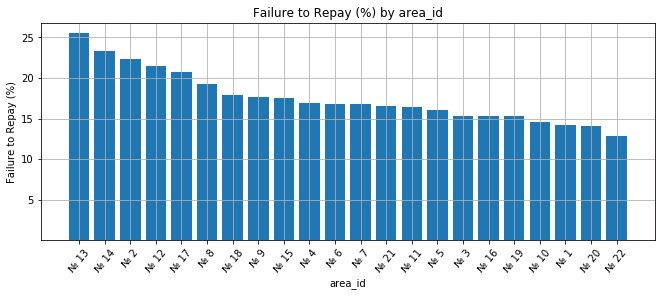

In [55]:
p = data.groupby("area_id")['loan_default'].agg(('mean','count')).sort_values("mean", ascending=False) # отсортировал по среднему
plt.figure(figsize = (11, 4))
plt.bar(["№ "+ str(x) for x in p.index], p.iloc[:,0]*100)

plt.grid()
plt.yticks([5,10,15,20,25])
# Labeling of plot
plt.xlabel("area_id"); plt.ylabel('Density'); plt.title('Failure to Repay (%) by area_id');
plt.xticks(rotation = 50);
plt.ylabel('Failure to Repay (%)')
plt.show()

#### В зависимости от локации выдачи кредита вероятность дефолта находится в диапазоне от 13% до 26%.  

##### Заемщик в возрасте от 31 года, оформляющий кредит на автомобиль с первоначальным взносом не менее 30 % и имеющий кредитный рейтинг не менее 6 (из 14) – с вероятностью более 91 % не допустит дефолта.

In [75]:
round(data[(data.ltv < 70) & (data.age >31) & (data.Credit_level > 6) ].loan_default.value_counts(normalize=True)[0]*100,2)

91.13

#####  Если он планирует брать марки (86,145,67 или 51) вероятность дефолта уменьшается еще на 1 %

In [78]:
round(data[(data.ltv < 70) & (data.age >31) & (data.Credit_level > 7) & ((data.manufacturer_id == 86)|(data.manufacturer_id == 145)|(data.manufacturer_id == 67)|(data.manufacturer_id == 51))].loan_default.value_counts(normalize=True)[0]*100,2)

92.12